# Chapter 07: Matrix Applications

## Concepts

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
from skimage import io,color
from scipy.signal import convolve2d

rc('animation', html='jshtml')

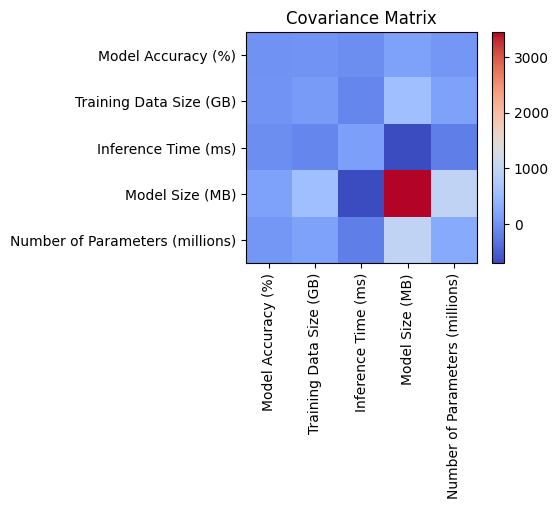

In [32]:
# Multivariate Data Covariance Matrices

# Our data to measure covariance on
data = [
    {"Model Accuracy (%)": 91.5, "Training Data Size (GB)": 15, "Inference Time (ms)": 50, "Model Size (MB)": 320, "Number of Parameters (millions)": 45},
    {"Model Accuracy (%)": 92.0, "Training Data Size (GB)": 18, "Inference Time (ms)": 48, "Model Size (MB)": 340, "Number of Parameters (millions)": 50},
    {"Model Accuracy (%)": 89.8, "Training Data Size (GB)": 10, "Inference Time (ms)": 60, "Model Size (MB)": 300, "Number of Parameters (millions)": 38},
    {"Model Accuracy (%)": 94.2, "Training Data Size (GB)": 25, "Inference Time (ms)": 40, "Model Size (MB)": 400, "Number of Parameters (millions)": 65},
    {"Model Accuracy (%)": 93.1, "Training Data Size (GB)": 22, "Inference Time (ms)": 42, "Model Size (MB)": 380, "Number of Parameters (millions)": 58},
    {"Model Accuracy (%)": 88.6, "Training Data Size (GB)": 8, "Inference Time (ms)": 65, "Model Size (MB)": 290, "Number of Parameters (millions)": 35},
    {"Model Accuracy (%)": 95.0, "Training Data Size (GB)": 30, "Inference Time (ms)": 38, "Model Size (MB)": 420, "Number of Parameters (millions)": 70},
    {"Model Accuracy (%)": 87.4, "Training Data Size (GB)": 5, "Inference Time (ms)": 70, "Model Size (MB)": 280, "Number of Parameters (millions)": 30},
    {"Model Accuracy (%)": 90.2, "Training Data Size (GB)": 12, "Inference Time (ms)": 55, "Model Size (MB)": 310, "Number of Parameters (millions)": 40},
    {"Model Accuracy (%)": 96.3, "Training Data Size (GB)": 35, "Inference Time (ms)": 30, "Model Size (MB)": 450, "Number of Parameters (millions)": 80},
    {"Model Accuracy (%)": 91.9, "Training Data Size (GB)": 17, "Inference Time (ms)": 52, "Model Size (MB)": 330, "Number of Parameters (millions)": 47},
    {"Model Accuracy (%)": 94.7, "Training Data Size (GB)": 28, "Inference Time (ms)": 39, "Model Size (MB)": 410, "Number of Parameters (millions)": 68},
    {"Model Accuracy (%)": 90.8, "Training Data Size (GB)": 14, "Inference Time (ms)": 53, "Model Size (MB)": 325, "Number of Parameters (millions)": 46},
    {"Model Accuracy (%)": 95.5, "Training Data Size (GB)": 32, "Inference Time (ms)": 36, "Model Size (MB)": 435, "Number of Parameters (millions)": 75},
    {"Model Accuracy (%)": 86.9, "Training Data Size (GB)": 6, "Inference Time (ms)": 68, "Model Size (MB)": 285, "Number of Parameters (millions)": 32},
    {"Model Accuracy (%)": 93.4, "Training Data Size (GB)": 20, "Inference Time (ms)": 45, "Model Size (MB)": 370, "Number of Parameters (millions)": 55},
    {"Model Accuracy (%)": 88.1, "Training Data Size (GB)": 9, "Inference Time (ms)": 62, "Model Size (MB)": 295, "Number of Parameters (millions)": 37},
    {"Model Accuracy (%)": 97.0, "Training Data Size (GB)": 38, "Inference Time (ms)": 28, "Model Size (MB)": 460, "Number of Parameters (millions)": 85},
    {"Model Accuracy (%)": 89.5, "Training Data Size (GB)": 11, "Inference Time (ms)": 58, "Model Size (MB)": 305, "Number of Parameters (millions)": 39},
    {"Model Accuracy (%)": 92.8, "Training Data Size (GB)": 19, "Inference Time (ms)": 47, "Model Size (MB)": 360, "Number of Parameters (millions)": 53}
]

# Create DataFrame
df = pd.DataFrame(data)

df_values = df.values

# Mean-center the data
datamean = np.mean(df_values,axis=0)
data_mean_centered = df_values - datamean

# Compute covariance matrix
cov_matrix = data_mean_centered.T @ data_mean_centered  # data matrix times its transpose
cov_matrix /= (data_mean_centered.shape[0] - 1) # divide by N-1

# dynamic color scaling
clim = np.max(np.abs(cov_matrix)) * .2

# Plotting
plt.figure(figsize=(4, 3))
plt.imshow(cov_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(len(df.columns)), labels=df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.title('Covariance Matrix')
plt.grid(False)
plt.savefig('covariance_matrix.png', dpi=300)
plt.show()

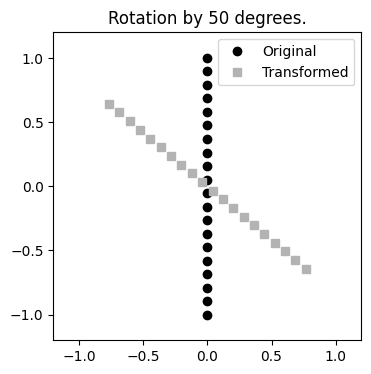

In [52]:
# Geometric Transformations via Matrix-Vector Multiplication

# angle to rotate by
theta = np.pi/3.6

transformation_matrix = np.array([
              [np.cos(theta),-np.sin(theta)],
              [np.sin(theta),np.cos(theta)]
            ])


vertical_line = np.linspace(-1,1,20)
original_points = np.vstack((np.zeros(vertical_line.shape),vertical_line))


# apply the transformation
transformed_points = transformation_matrix @ original_points


# plot the points
plt.figure(figsize=(4, 4))
plt.plot(original_points[0,:], original_points[1,:],'ko',label='Original')
plt.plot(transformed_points[0,:],transformed_points[1,:],'s',color=[.7,.7,.7],label='Transformed')

plt.axis('square')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.legend()
plt.title(f'Rotation by {np.rad2deg(theta):.0f} degrees.')
plt.show()
     


In [65]:
def aframe(ph):
    # create the transformation matrix
    transformation_matrix = np.array([
        [1, 1-ph],
        [0, -1]
    ])

    # apply the transformation to the points using matrix multiplication
    transformed_points = transformation_matrix @ points

    # update the dots
    plth.set_xdata(transformed_points[0,:])
    plth.set_ydata(transformed_points[1,:])

    # export the plot handles
    return plth,

# define XY points
theta = np.linspace(0, 2*np.pi, 100)
points = np.vstack((np.sin(theta), np.cos(theta)))

# setup figure
fig, ax = plt.subplots(1, figsize=(12, 6))
plth, = ax.plot(points[0,:], points[1,:], 'ko')
ax.set_aspect('equal')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

# define values for transformation (note: clip off the final point for a smooth animation loop)
phi = np.linspace(-1, 1-1/40, 40)**2

# run animation!
ani = animation.FuncAnimation(fig, aframe, frames=phi, interval=100, repeat=True)

# Close the figure so it does not display statically
plt.close(fig)

# To display the animation in a Jupyter notebook, use IPython display
HTML(ani.to_html5_video())

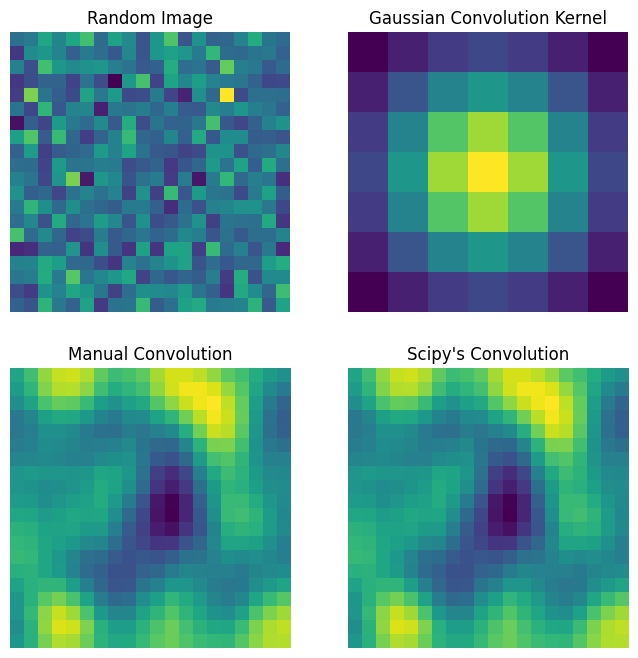

In [79]:
# Generate a random image
image_size = 20
random_image = np.random.randn(image_size, image_size)

# Create a Gaussian kernel for convolution
kernel_size = 7
grid_Y, grid_X = np.meshgrid(np.linspace(-3, 3, kernel_size), np.linspace(-3, 3, kernel_size))
gaussian_kernel = np.exp(-(grid_X**2 + grid_Y**2) / 7)
gaussian_kernel /= np.sum(gaussian_kernel)  # Normalize the kernel

# Prepare for the convolution
half_kernel_size = kernel_size // 2
convolution_output = np.zeros((image_size + kernel_size - 1, image_size + kernel_size - 1))

# Pad the image with zeros to accommodate the kernel size
padded_image = np.zeros(convolution_output.shape)
padded_image[half_kernel_size:-half_kernel_size, half_kernel_size:-half_kernel_size] = random_image

# Perform convolution using nested loops
for row_index in range(half_kernel_size, image_size + half_kernel_size):
    for column_index in range(half_kernel_size, image_size + half_kernel_size):
        # Extract a segment of the image corresponding to the kernel's size
        image_segment = padded_image[
            row_index - half_kernel_size : row_index + half_kernel_size + 1,
            column_index - half_kernel_size : column_index + half_kernel_size + 1
        ]

        # Compute the dot product of the kernel with the image segment
        dot_product_result = np.sum(image_segment * gaussian_kernel)

        # Store the result in the convolution output matrix
        convolution_output[row_index, column_index] = dot_product_result

# Trim the padded edges from the convolution output
final_convolution_output = convolution_output[
    half_kernel_size : -half_kernel_size,
    half_kernel_size : -half_kernel_size
]

# Perform convolution using Scipy's built-in function for comparison
scipy_convolution_output = convolve2d(random_image, gaussian_kernel, mode='same')

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

axes[0, 0].imshow(random_image)
axes[0, 0].set_title('Random Image')

axes[0, 1].imshow(gaussian_kernel)
axes[0, 1].set_title('Gaussian Convolution Kernel')

axes[1, 0].imshow(final_convolution_output)
axes[1, 0].set_title('Manual Convolution')

axes[1, 1].imshow(scipy_convolution_output)
axes[1, 1].set_title("Scipy's Convolution")

# Remove axis ticks for a cleaner look
for ax in axes.flatten():
    ax.axis('off')

plt.show()


## Code Exercises

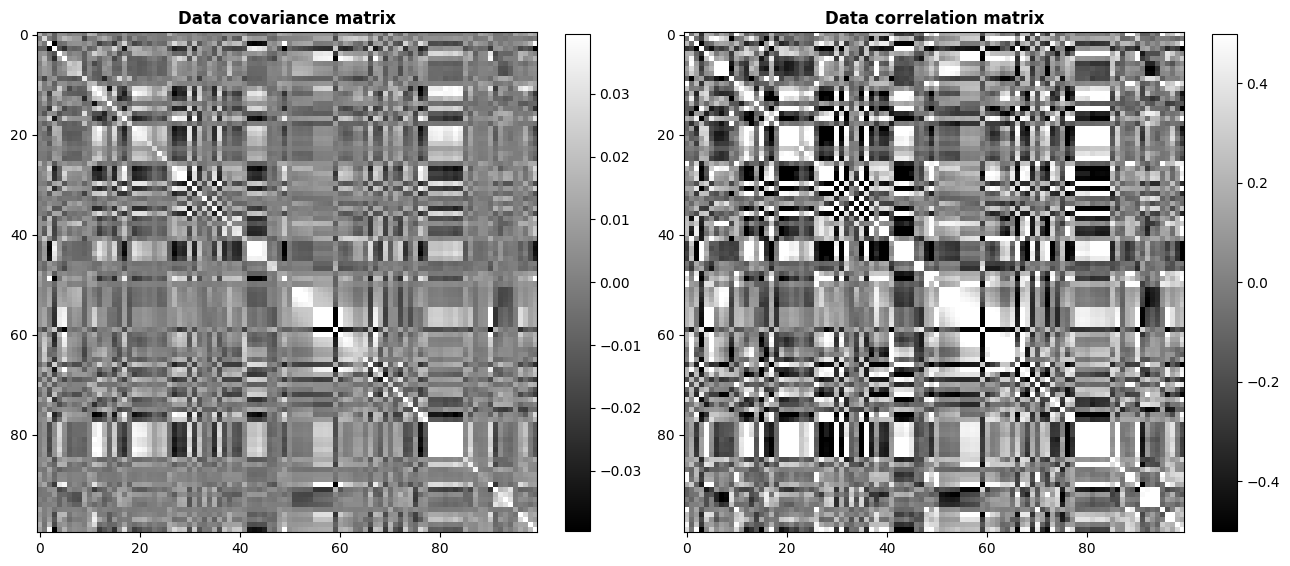

In [94]:
# Exercise 7-1 (Transform Covariance Matrix to Correlation Matrix)

url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

df = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
df_values = df.drop(['state','fold'],axis=1).values

# Mean-center the data
datamean = np.mean(df_values,axis=0)
data_mean_centered = df_values - datamean

# Compute covariance matrix
cov_matrix = data_mean_centered.T @ data_mean_centered  # data matrix times its transpose
cov_matrix /= (data_mean_centered.shape[0] - 1) # divide by N-1

# dynamic color scaling
clim = np.max(np.abs(cov_matrix)) * .2

# compute the correlation matrix manuallyu
variances = np.diag(cov_matrix) # variances are the diagonals of a covariance
standard_devs = np.sqrt(variances)
S = np.diag(1 / standard_devs)

correlation_matrix = S @ cov_matrix @ S

# and show the matrices
fig, axis = plt.subplots(1,2,figsize=(13,6))
h1 = axis[0].imshow(cov_matrix,vmin=-clim,vmax=clim,cmap='gray')
axis[0].set_title('Data covariance matrix',fontweight='bold')

h2 = axis[1].imshow(correlation_matrix,vmin=-.5,vmax=.5,cmap='gray')
axis[1].set_title('Data correlation matrix',fontweight='bold')

fig.colorbar(h1, ax=axis[0], fraction=.045)
fig.colorbar(h2, ax=axis[1], fraction=.045)

plt.tight_layout()
plt.show()

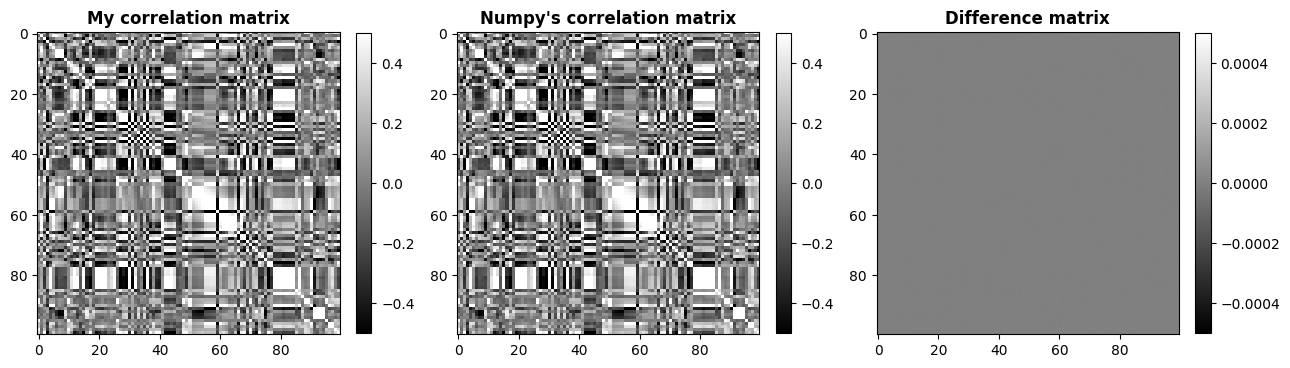

In [95]:
# Exercise 7-2 (Replicate chart using numpy's correlation coefficient function)

# Calculate the correlation matrix with numpy
correlation_matrix_np = np.corrcoef(df_values.T)

# Plot!
fig,axis = plt.subplots(1,3,figsize=(13,6))
h1 = axis[0].imshow(correlation_matrix,vmin=-.5,vmax=.5,cmap='gray')
axis[0].set_title('My correlation matrix',fontweight='bold')

h2 = axis[1].imshow(correlation_matrix_np,vmin=-.5,vmax=.5,cmap='gray')
axis[1].set_title("Numpy's correlation matrix",fontweight='bold')

h3 = axis[2].imshow(correlation_matrix_np - correlation_matrix,vmin=-.0005,vmax=.0005,cmap='gray')
axis[2].set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1, ax=axis[0], fraction=.045)
fig.colorbar(h2, ax=axis[1], fraction=.045)
fig.colorbar(h3, ax=axis[2], fraction=.045)

plt.tight_layout()
plt.show()

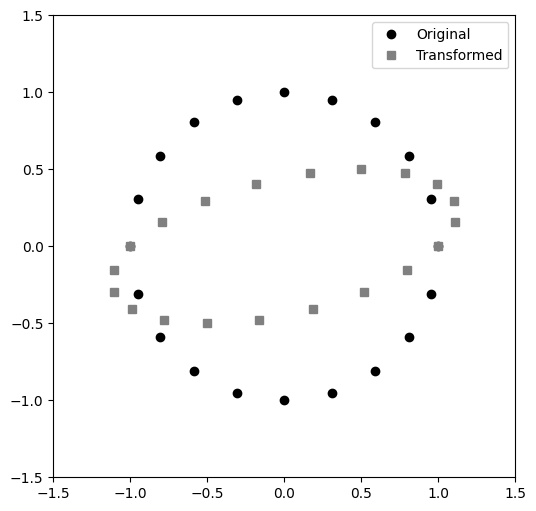

In [96]:
# Exercise 7-3 (Matrix Transformation)

transformation_matrix = np.array([
              [1,.5],
              [0,.5]
            ])


# define the set of points (a circle)
theta = np.linspace(0, 2 * np.pi - 2 * np.pi / 20, 20)
original_points = np.vstack((np.cos(theta), np.sin(theta)))

# apply transformation
transformedPoints = transformation_matrix @ original_points

# plot the points
plt.figure(figsize=(6,6))
plt.plot(original_points[0,:], original_points[1,:], 'ko', label='Original')
plt.plot(transformedPoints[0,:], transformedPoints[1,:], 's',
         color="grey", label='Transformed')

plt.axis('square')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.legend()
plt.show()

In [99]:
# Exercise 7-4 (Matrix Transformation Movie "Coiling DNA")

def aframe(ph):

  # create the transformation matrix
  transformation_matrix = np.array([ [  1-ph/3,0 ],
                 [  0,ph   ] ])

  # apply the transformation to the points using matrix multiplication
  P1 = transformation_matrix @ Y1
  P2 = transformation_matrix @ Y2

  # update the lower/upper lines
  plth1.set_xdata(P1[0,:])
  plth1.set_ydata(P1[1,:])

  plth2.set_xdata(P2[0,:])
  plth2.set_ydata(P2[1,:])

  # export the plot handles
  return (plth1,plth2)
     
# define XY points
theta = np.linspace(0,2 * np.pi, 100)
Y1 = np.vstack((theta, np.cos(theta)))
Y2 = np.vstack((theta, np.sin(theta)))

# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))

plth1, = ax.plot(Y1[0,:], Y1[1,:], 'ko')
plth2, = ax.plot(Y2[0,:], Y2[1,:], 's', color="grey")
ax.set_ylim([-2, 2])


# define phases and run animation
phi = 1-np.linspace(-1, 1-1/40, 40) ** 2
ani = animation.FuncAnimation(fig, aframe, phi, interval=50, repeat=True)

# Close the figure so it does not display statically
plt.close(fig)

# To display the animation in a Jupyter notebook, use IPython display
HTML(ani.to_html5_video())

In [ ]:
# Exercise 7-5 (Smoothing a picture with convolution filter)


# initialize smoothed image
smooth_bathtub = np.zeros(bathtub.shape)

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i],kernel,mode='same')


fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()

Image Shape: (1675, 3000, 3)


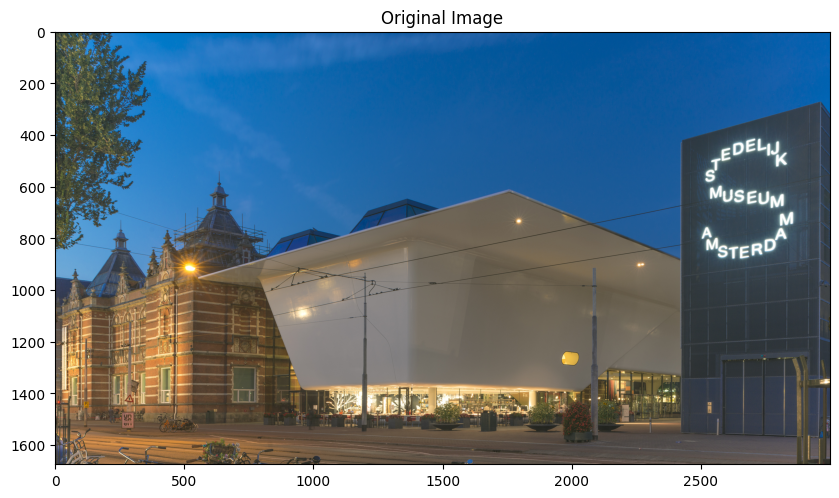

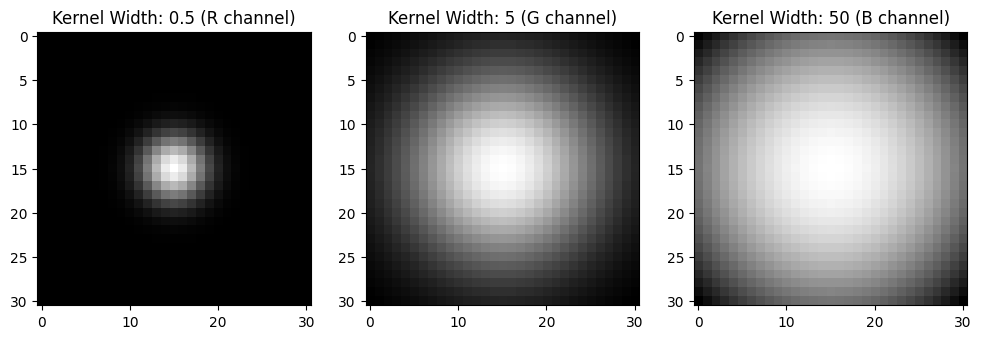

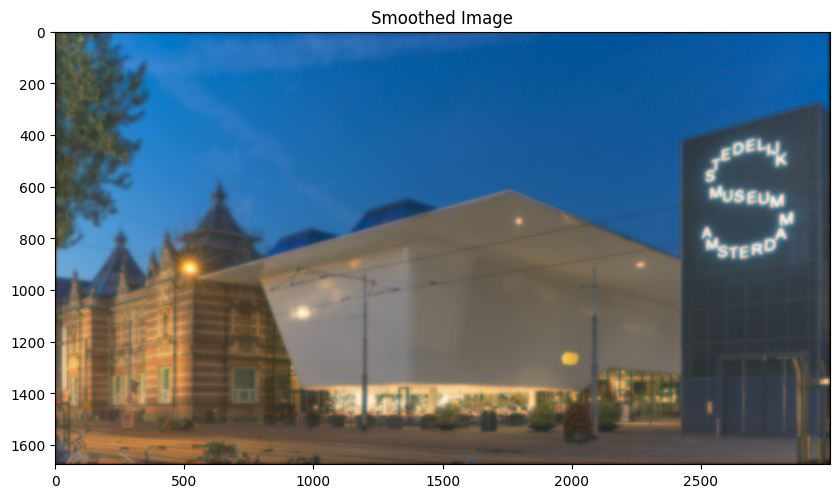

In [103]:
# Exercise 7-6 (Smoothing with varying widths of distributions applied to the filters for each channel)

def create_gaussian_kernel(size, width):
    """Create a normalized Gaussian kernel with given size and width."""
    Y, X = np.meshgrid(np.linspace(-3, 3, size), np.linspace(-3, 3, size))
    kernel = np.exp(-(X**2 + Y**2) / width)
    return kernel / np.sum(kernel)

def apply_smoothing(image, kernel_widths):
    """Apply smoothing with different kernels for each channel of the image."""
    kernel_size = 31  # Fixed kernel size for all channels
    smoothed_image = np.zeros_like(image)
    kernels = []
    
    # Create and apply kernels for each channel
    for i in range(3):  # Assuming a 3-channel (RGB) image
        kernel = create_gaussian_kernel(kernel_size, kernel_widths[i])
        kernels.append(kernel)
        smoothed_image[:, :, i] = convolve2d(image[:, :, i], kernel, mode='same')
    
    return smoothed_image, kernels

def display_images(original, smoothed, kernels):
    """Display original, smoothed images and their kernels."""
    plt.figure(figsize=(10, 6))
    plt.imshow(original)
    plt.title('Original Image')
    plt.show()

    _, axis = plt.subplots(1, 3, figsize=(12, 6))
    for i, ax in enumerate(axis):
        ax.imshow(kernels[i], cmap='gray')
        ax.set_title(f'Kernel Width: {kernel_widths[i]} ({"RGB"[i]} channel)')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.imshow(smoothed.astype(np.uint8))
    plt.title('Smoothed Image')
    plt.show()

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg'
bathtub = io.imread(url)
print('Image Shape:', bathtub.shape)

# Set the kernel widths for each channel
kernel_widths = [0.5, 5, 50]

# Apply smoothing
smooth_bathtub, kernels = apply_smoothing(bathtub, kernel_widths)

# Display results
display_images(bathtub, smooth_bathtub, kernels)

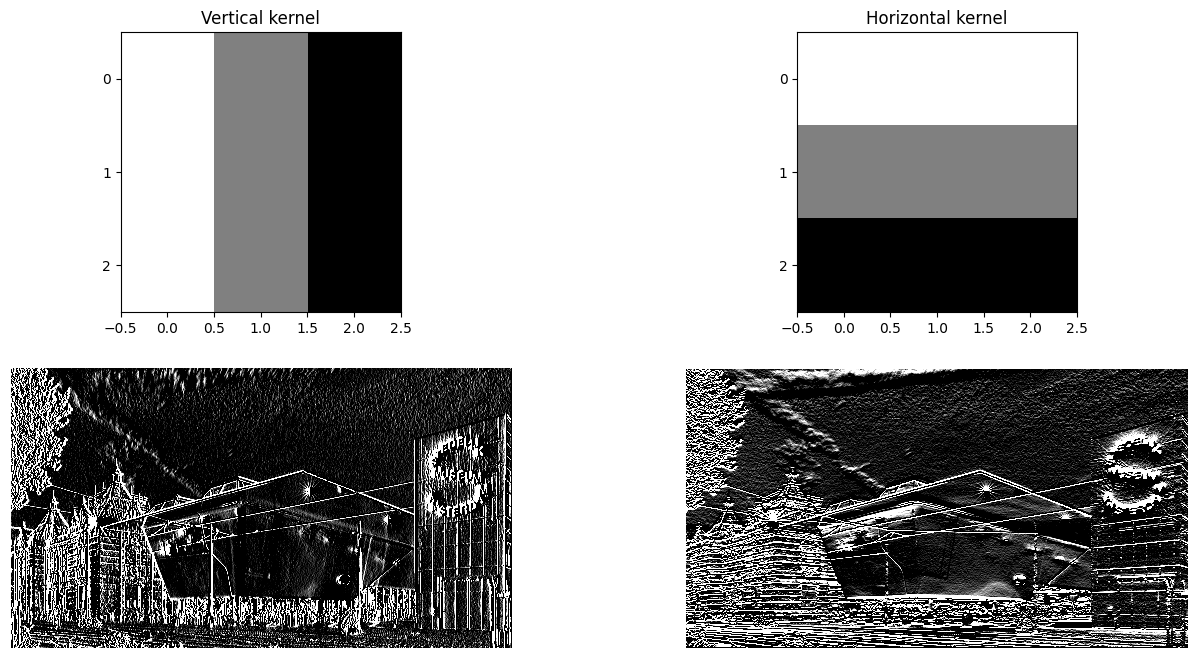

In [106]:
# Exercise 7-7 (Edge Detection Convolution filter)

vertical_kernel = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

horizontal_kernel = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])

fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(vertical_kernel,cmap='gray')
ax[0,0].set_title('Vertical kernel')
ax[0,0].set_yticks(range(3))

ax[0,1].imshow(horizontal_kernel,cmap='gray')
ax[0,1].set_title('Horizontal kernel')
ax[0,1].set_yticks(range(3))

bathtub2d = color.rgb2gray(bathtub)

# run convolution and show the result
convres = convolve2d(bathtub2d, vertical_kernel, mode='same')
ax[1,0].imshow(convres, cmap='gray', vmin=0, vmax=.01)
ax[1,0].axis('off')

convres = convolve2d(bathtub2d, horizontal_kernel, mode='same')
ax[1,1].imshow(convres, cmap='gray', vmin=0, vmax=.01)
ax[1,1].axis('off')

plt.show()